In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
df2016 = pd.read_csv('PerGame_Salary_2016.csv', index_col=0)
df2017 = pd.read_csv('PerGame_Salary_2017.csv', index_col=0)
df2018 = pd.read_csv('PerGame_Salary_2018.csv', index_col=0)
df2019 = pd.read_csv('PerGame_Salary_2019.csv', index_col=0)
df2020 = pd.read_csv('PerGame_Salary_2020.csv', index_col=0)

In [3]:
all_files = set(glob.glob("*.csv")) - set(glob.glob("PerGame_Salary_2020.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df ## original concatenated csv files

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,25842697.0
1,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,3454080.0
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,26000000.0
3,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,79568.0
4,Nickeil AlexanderWalker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,Joe Young,PG,23.0,IND,41.0,0.0,9.4,1.5,4.1,0.367,...,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8,NaN
4589,Nick Young,SG,30.0,LAL,54.0,2.0,19.1,2.3,6.9,0.339,...,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3,5219169.0
4590,Thaddeus Young,PF,27.0,BRK,73.0,73.0,33.0,6.8,13.2,0.514,...,2.4,6.6,9.0,1.9,1.5,0.5,1.9,2.5,15.1,11235955.0
4591,Cody Zeller,C,23.0,CHO,73.0,60.0,24.3,3.2,6.0,0.529,...,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7,4204200.0


In [4]:
df.drop_duplicates()
df = df.loc[df['Salary'].notna()]
df = df.reset_index()

In [5]:
df = df.drop(df.columns[[0, 1]], axis=1) 
df

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,25842697.0
1,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,3454080.0
2,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,26000000.0
3,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,79568.0
4,SG,24.0,MEM,38.0,0.0,18.9,3.1,6.6,0.466,1.5,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,2429400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,SG,20.0,BOS,29.0,0.0,6.9,0.4,1.2,0.306,0.2,...,0.1,0.8,0.9,0.3,0.2,0.0,0.2,0.6,1.0,1749840.0
4263,SG,30.0,LAL,54.0,2.0,19.1,2.3,6.9,0.339,1.4,...,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3,5219169.0
4264,PF,27.0,BRK,73.0,73.0,33.0,6.8,13.2,0.514,0.1,...,2.4,6.6,9.0,1.9,1.5,0.5,1.9,2.5,15.1,11235955.0
4265,C,23.0,CHO,73.0,60.0,24.3,3.2,6.0,0.529,0.0,...,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7,4204200.0


In [6]:
for col in df.columns:
  print(str(col), df[col].isnull().sum())

Pos 0
Age 0
Tm 0
G 0
GS 0
MP 0
FG 0
FGA 0
FG% 17
3P 0
3PA 0
3P% 342
2P 0
2PA 0
2P% 52
eFG% 17
FT 0
FTA 0
FT% 191
ORB 0
DRB 0
TRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0
Salary 0


In [7]:
df['FG%'] = df['FG'].div(df['FGA']).replace(np.inf, 0).replace(np.nan, 0)
df['3P%'] = df['3P'].div(df['3PA']).replace(np.inf, 0).replace(np.nan, 0)
df['2P%'] = df['2P'].div(df['2PA']).replace(np.inf, 0).replace(np.nan, 0)
df['FT%'] = df['FT'].div(df['FTA']).replace(np.inf, 0).replace(np.nan, 0)
#(FGM + 0.5 * 3PM) / FGA
df['eFG%'] = (df['FG'] + (0.5*df['3P'])).div(df['FGA']).replace(np.inf, 0).replace(np.nan, 0)

In [8]:
for col in df.columns:
  print(str(col), df[col].isnull().sum())

Pos 0
Age 0
Tm 0
G 0
GS 0
MP 0
FG 0
FGA 0
FG% 0
3P 0
3PA 0
3P% 0
2P 0
2PA 0
2P% 0
eFG% 0
FT 0
FTA 0
FT% 0
ORB 0
DRB 0
TRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0
Salary 0


In [9]:
df = df.drop('Tm', axis=1) #returns a numpy array
positions = {'PG': 1,
             'SG-PG': 1.5,
             'PG-SG': 1.5,
             'SG': 2,
             'SF-SG': 2.5,
             'SF': 3,
             'SF-PF': 3.5,
             'PF-SF': 3.5,
             'SF-C': 4,
             'PF': 4,
             'PF-C': 4.5,
             'C-PF': 4.5,
             'C': 5}
df['Pos'] = df['Pos'].map(positions)
temp = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
df = pd.DataFrame(x_scaled, columns=df.columns)
print(df)
X_train = df.drop('Salary',axis=1)
y_train = df['Salary']
print(y_train)
print(X_train)

       Pos       Age         G        GS        MP        FG       FGA  \
0     1.00  0.291667  0.765432  0.768293  0.695187  0.412844  0.310204   
1     0.75  0.125000  0.876543  0.878049  0.879679  0.559633  0.448980   
2     1.00  0.625000  0.641975  0.646341  0.866310  0.678899  0.612245   
3     1.00  0.166667  0.012346  0.000000  0.155080  0.045872  0.040816   
4     0.25  0.208333  0.456790  0.000000  0.486631  0.284404  0.269388   
...    ...       ...       ...       ...       ...       ...       ...   
4262  0.25  0.041667  0.345679  0.000000  0.165775  0.036697  0.048980   
4263  0.25  0.458333  0.654321  0.024390  0.491979  0.211009  0.281633   
4264  0.75  0.333333  0.888889  0.890244  0.863636  0.623853  0.538776   
4265  1.00  0.166667  0.888889  0.731707  0.631016  0.293578  0.244898   
4266  1.00  0.291667  0.728395  0.036585  0.296791  0.211009  0.195918   

           FG%        3P       3PA  ...       ORB       DRB      TRB  \
0     0.592105  0.000000  0.000000  ...

In [10]:
df2020.drop_duplicates()
df2020 = df2020.loc[df2020['Salary'].notna()]
df2020 = df2020.reset_index()
df2020 = df2020.drop(df2020.columns[[0, 1]], axis=1) 
df2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,25842697.0
1,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,3454080.0
2,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,26000000.0
3,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,79568.0
4,SG,24.0,MEM,38.0,0.0,18.9,3.1,6.6,0.466,1.5,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,2429400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,0.437,3.4,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,6273000.0
455,C,27.0,CHO,58.0,39.0,23.1,4.3,8.3,0.524,0.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,14471910.0
456,C,30.0,SAS,2.0,0.0,2.0,0.5,2.0,0.250,0.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,245686.0
457,C,23.0,CLE,22.0,0.0,10.0,1.9,3.3,0.569,0.0,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2281800.0


In [11]:
for col in df2020.columns:
  print(str(col), df2020[col].isnull().sum())

Pos 0
Age 0
Tm 0
G 0
GS 0
MP 0
FG 0
FGA 0
FG% 1
3P 0
3PA 0
3P% 24
2P 0
2PA 0
2P% 2
eFG% 1
FT 0
FTA 0
FT% 17
ORB 0
DRB 0
TRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0
Salary 0


In [12]:
df = df2020
df['FG%'] = df['FG'].div(df['FGA']).replace(np.inf, 0).replace(np.nan, 0)
df['3P%'] = df['3P'].div(df['3PA']).replace(np.inf, 0).replace(np.nan, 0)
df['2P%'] = df['2P'].div(df['2PA']).replace(np.inf, 0).replace(np.nan, 0)
df['FT%'] = df['FT'].div(df['FTA']).replace(np.inf, 0).replace(np.nan, 0)
#(FGM + 0.5 * 3PM) / FGA
df['eFG%'] = (df['FG'] + (0.5*df['3P'])).div(df['FGA']).replace(np.inf, 0).replace(np.nan, 0)

In [13]:
df

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592105,0.0,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,25842697.0
1,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.554545,0.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,3454080.0
2,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493333,1.2,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,26000000.0
3,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500000,0.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,79568.0
4,SG,24.0,MEM,38.0,0.0,18.9,3.1,6.6,0.469697,1.5,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,2429400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,0.437500,3.4,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,6273000.0
455,C,27.0,CHO,58.0,39.0,23.1,4.3,8.3,0.518072,0.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,14471910.0
456,C,30.0,SAS,2.0,0.0,2.0,0.5,2.0,0.250000,0.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,245686.0
457,C,23.0,CLE,22.0,0.0,10.0,1.9,3.3,0.575758,0.0,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2281800.0


In [14]:
for col in df.columns:
  print(str(col), df[col].isnull().sum())

Pos 0
Age 0
Tm 0
G 0
GS 0
MP 0
FG 0
FGA 0
FG% 0
3P 0
3PA 0
3P% 0
2P 0
2PA 0
2P% 0
eFG% 0
FT 0
FTA 0
FT% 0
ORB 0
DRB 0
TRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0
Salary 0


In [381]:
df = df.drop('Tm', axis=1) #returns a numpy array
positions = {'PG': 1,
             'SG-PG': 1.5,
             'PG-SG': 1.5,
             'SG': 2,
             'SF-SG': 2.5,
             'SF': 3,
             'SF-PF': 3.5,
             'PF-SF': 3.5,
             'SF-C': 4,
             'PF': 4,
             'PF-C': 4.5,
             'C-PF': 4.5,
             'C': 5}
df['Pos'] = df['Pos'].map(positions)
temp = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp)
df = pd.DataFrame(x_scaled, columns=df.columns)
print(df)
X_test = df.drop('Salary',axis=1)
y_test = df['Salary']
print(y_test)
print(X_test)

      Pos       Age         G        GS  ...       TOV        PF       PTS    Salary
0    1.00  0.291667  0.849315  0.863014  ...  0.312500  0.387755  0.317784  0.641758
1    0.75  0.125000  0.972603  0.986301  ...  0.583333  0.510204  0.463557  0.084353
2    1.00  0.625000  0.712329  0.726027  ...  0.291667  0.489796  0.551020  0.645675
3    1.00  0.166667  0.013699  0.000000  ...  0.104167  0.102041  0.029155  0.000338
4    0.25  0.208333  0.506849  0.000000  ...  0.187500  0.285714  0.253644  0.058842
..    ...       ...       ...       ...  ...       ...       ...       ...       ...
454  0.00  0.083333  0.808219  0.821918  ...  1.000000  0.346939  0.862974  0.154535
455  1.00  0.333333  0.780822  0.534247  ...  0.270833  0.489796  0.323615  0.358662
456  1.00  0.458333  0.013699  0.000000  ...  0.000000  0.000000  0.029155  0.004474
457  1.00  0.166667  0.287671  0.000000  ...  0.104167  0.244898  0.128280  0.055167
458  1.00  0.125000  0.972603  0.958904  ...  0.166667  0.469388 

In [382]:
for col in X_test.columns:
  print(str(col), np.isinf(df[col]).sum())
  print(str(col), df[col].isnull().sum())
print(np.isinf(y_train).sum())
print(y_train.isnull().sum())
print(np.isinf(y_test).sum())
print(y_test.isnull().sum())

Pos 0
Pos 0
Age 0
Age 0
G 0
G 0
GS 0
GS 0
MP 0
MP 0
FG 0
FG 0
FGA 0
FGA 0
FG% 0
FG% 0
3P 0
3P 0
3PA 0
3PA 0
3P% 0
3P% 0
2P 0
2P 0
2PA 0
2PA 0
2P% 0
2P% 0
eFG% 0
eFG% 0
FT 0
FT 0
FTA 0
FTA 0
FT% 0
FT% 0
ORB 0
ORB 0
DRB 0
DRB 0
TRB 0
TRB 0
AST 0
AST 0
STL 0
STL 0
BLK 0
BLK 0
TOV 0
TOV 0
PF 0
PF 0
PTS 0
PTS 0
0
0
0
0


In [383]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [384]:
!pip install catboost

In [385]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = CatBoostRegressor(iterations=100,
                          learning_rate=.1,
                          depth=10)
# Fit model
model.fit(X_train, y_train)
# Get predictions
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE is', rmse)
print('R squared is', r2)

0:	learn: 0.1778665	total: 31.2ms	remaining: 3.08s
1:	learn: 0.1696282	total: 58.8ms	remaining: 2.88s
2:	learn: 0.1620619	total: 85.5ms	remaining: 2.76s
3:	learn: 0.1554637	total: 112ms	remaining: 2.69s
4:	learn: 0.1501173	total: 141ms	remaining: 2.67s
5:	learn: 0.1450389	total: 171ms	remaining: 2.67s
6:	learn: 0.1397294	total: 197ms	remaining: 2.62s
7:	learn: 0.1356984	total: 225ms	remaining: 2.58s
8:	learn: 0.1319482	total: 254ms	remaining: 2.56s
9:	learn: 0.1285572	total: 281ms	remaining: 2.53s
10:	learn: 0.1254154	total: 308ms	remaining: 2.49s
11:	learn: 0.1223795	total: 334ms	remaining: 2.45s
12:	learn: 0.1196179	total: 361ms	remaining: 2.42s
13:	learn: 0.1172806	total: 388ms	remaining: 2.38s
14:	learn: 0.1151920	total: 415ms	remaining: 2.35s
15:	learn: 0.1131411	total: 441ms	remaining: 2.32s
16:	learn: 0.1110738	total: 473ms	remaining: 2.31s
17:	learn: 0.1094832	total: 508ms	remaining: 2.31s
18:	learn: 0.1076795	total: 535ms	remaining: 2.28s
19:	learn: 0.1061312	total: 567ms	rema

RMSE is 0.12273339469088058
R squared is 0.6918103172124515


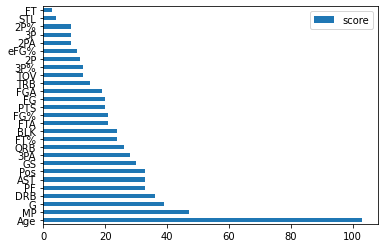

In [386]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 100, seed = 42)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE is', rmse)
print('R squared is', r2)

feature_important = xgb_r.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')